In [1]:
#This part is for importing libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc

In [2]:
#This part simply extracts the data from the hdf5 file and puts it into an array
hf = h5py.File("SkyNet_r-process.h5")
list(hf)

['A',
 'BindingEnergy',
 'Density',
 'Dt',
 'Entropy',
 'EtaE',
 'HeatingRate',
 'Temperature',
 'Time',
 'Y',
 'Ye',
 'Z']

In [28]:
#This section defines temperature, time, and the extended parts of it.
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []

linear = np.polyfit(np.log10(np.array(time[900:1700])),np.log10(np.array(temperature[900:1700])),1)
m = linear[0]

#m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))

for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])

Text(0.5, 1.0, 'Log Log Plot of Temperature vs Time for Kilonova Material')

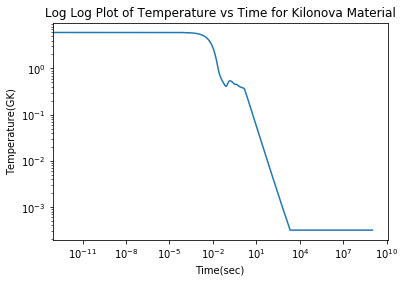

In [29]:
#Plotting Graph 1: Temperature Normal vs Time
plt.loglog(time,temperature)
plt.xlabel("Time(sec)")
plt.ylabel("Temperature(GK)")
plt.title("Log Log Plot of Temperature vs Time for Kilonova Material")

Text(0.5, 1.0, 'Log Log Plot of Temperature vs Time With Line Extended for Kilonova Material')

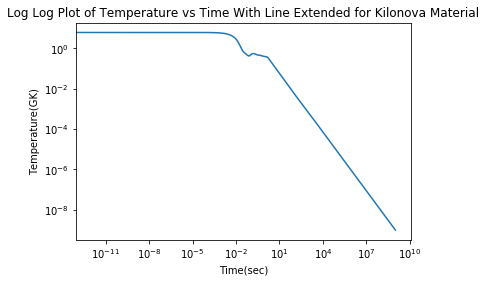

In [30]:
#Graph 2: Temperature vs Time for Linearized Part.
plt.loglog(time,full_temp)
plt.xlabel("Time(sec)")
plt.ylabel("Temperature(GK)")
plt.title("Log Log Plot of Temperature vs Time With Line Extended for Kilonova Material")

Text(0.5, 1.0, 'Log Log Plot of Energy vs Time With Line Extended for Kilonova Material')

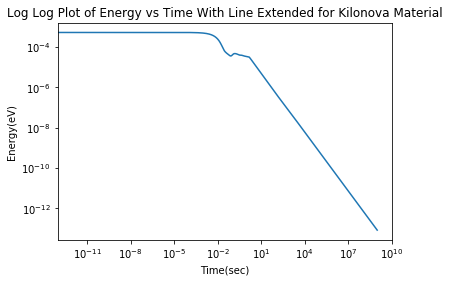

In [31]:
plt.loglog(time,np.array(full_temp)*8.617333262145*10**-5)
plt.xlabel("Time(sec)")
plt.ylabel("Energy(eV)")
plt.title("Log Log Plot of Energy vs Time With Line Extended for Kilonova Material")